# MNIST 손글씨 분류 - 신경망

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

- 데이터 전처리

In [2]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

11501568/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

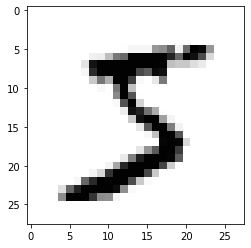

In [3]:
plt.imshow(X_train[0], cmap='Greys');

In [4]:
import sys
for row in X_train[0]:
    for x in row:
        sys.stdout.write(f'{x:3d}')
    sys.stdout.write('\n')

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

In [5]:
# X_train, X_test 정규화(0 ~ 1)
X_train = X_train / 255.
X_test = X_test / 255.

In [6]:
# 이미지 차원 변경: 2차원 --> 1차원
X_train = X_train.reshape(60000, -1)
X_test = X_test.reshape(-1, 784)
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [7]:
# y 값의 분포
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

In [8]:
# One hot encoding
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
Y_train.shape, Y_test.shape

((60000, 10), (10000, 10))

- 모델 정의 / 설정 / 학습 / 평가

In [9]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [18]:
model1 = Sequential([
    Dense(1000, input_dim=784, activation='relu'),
    Dense(256, activation='relu'),
    Dense(48, activation='relu'),
    Dense(10, activation='softmax')
])
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 1000)              785000    
                                                                 
 dense_12 (Dense)            (None, 256)               256256    
                                                                 
 dense_13 (Dense)            (None, 48)                12336     
                                                                 
 dense_14 (Dense)            (None, 10)                490       
                                                                 
Total params: 1,054,082
Trainable params: 1,054,082
Non-trainable params: 0
_________________________________________________________________


In [19]:
model1.compile('adam', 'categorical_crossentropy', ['accuracy'])

In [20]:
mc1 = ModelCheckpoint('mnist_best1.h5', verbose=1, save_best_only=True)
es1 = EarlyStopping(patience=10)
hist1 = model1.fit(X_train, Y_train, validation_split=0.2,
                   epochs=100, batch_size=200, verbose=0,
                   callbacks=[mc1, es1])


Epoch 1: val_loss improved from inf to 0.12516, saving model to mnist_best1.h5

Epoch 2: val_loss improved from 0.12516 to 0.09314, saving model to mnist_best1.h5

Epoch 3: val_loss improved from 0.09314 to 0.08213, saving model to mnist_best1.h5

Epoch 4: val_loss improved from 0.08213 to 0.07979, saving model to mnist_best1.h5

Epoch 5: val_loss did not improve from 0.07979

Epoch 6: val_loss did not improve from 0.07979

Epoch 7: val_loss did not improve from 0.07979

Epoch 8: val_loss did not improve from 0.07979

Epoch 9: val_loss did not improve from 0.07979

Epoch 10: val_loss did not improve from 0.07979

Epoch 11: val_loss did not improve from 0.07979

Epoch 12: val_loss did not improve from 0.07979

Epoch 13: val_loss did not improve from 0.07979

Epoch 14: val_loss did not improve from 0.07979


In [21]:
best_model1 = load_model('mnist_best1.h5')
best_model1.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0748 - accuracy: 0.9779


[0.0748458132147789, 0.9779000282287598]

- Dropout 추가

In [22]:
model2 = Sequential([
    Dense(1000, input_dim=784, activation='relu'),
    Dropout(0.25),
    Dense(256, activation='relu'),
    Dropout(0.25),
    Dense(48, activation='relu'),
    Dense(10, activation='softmax')
])
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 1000)              785000    
                                                                 
 dropout_4 (Dropout)         (None, 1000)              0         
                                                                 
 dense_16 (Dense)            (None, 256)               256256    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_17 (Dense)            (None, 48)                12336     
                                                                 
 dense_18 (Dense)            (None, 10)                490       
                                                                 
Total params: 1,054,082
Trainable params: 1,054,082
No

In [23]:
model2.compile('adam', 'categorical_crossentropy', ['accuracy'])

In [24]:
mc2 = ModelCheckpoint('mnist_best2.h5', verbose=1, save_best_only=True)
es2 = EarlyStopping(patience=10)
hist2 = model2.fit(X_train, Y_train, validation_split=0.2,
                   epochs=100, batch_size=200, verbose=0,
                   callbacks=[mc2, es2])


Epoch 1: val_loss improved from inf to 0.12922, saving model to mnist_best2.h5

Epoch 2: val_loss improved from 0.12922 to 0.09179, saving model to mnist_best2.h5

Epoch 3: val_loss improved from 0.09179 to 0.08448, saving model to mnist_best2.h5

Epoch 4: val_loss improved from 0.08448 to 0.07877, saving model to mnist_best2.h5

Epoch 5: val_loss improved from 0.07877 to 0.07792, saving model to mnist_best2.h5

Epoch 6: val_loss improved from 0.07792 to 0.07259, saving model to mnist_best2.h5

Epoch 7: val_loss did not improve from 0.07259

Epoch 8: val_loss did not improve from 0.07259

Epoch 9: val_loss did not improve from 0.07259

Epoch 10: val_loss did not improve from 0.07259

Epoch 11: val_loss did not improve from 0.07259

Epoch 12: val_loss did not improve from 0.07259

Epoch 13: val_loss did not improve from 0.07259

Epoch 14: val_loss did not improve from 0.07259

Epoch 15: val_loss did not improve from 0.07259

Epoch 16: val_loss did not improve from 0.07259


In [25]:
best_model2 = load_model('mnist_best2.h5')
best_model2.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0603 - accuracy: 0.9823


[0.06031329184770584, 0.9822999835014343]

- 훈련과정 시각화

In [30]:
y_acc1 = hist1.history['accuracy']
y_vloss1 = hist1.history['val_loss']
xs1 = np.arange(1, len(y_acc1)+1)

y_acc2 = hist2.history['accuracy']
y_vloss2 = hist2.history['val_loss']
xs2 = np.arange(1, len(y_acc2)+1)

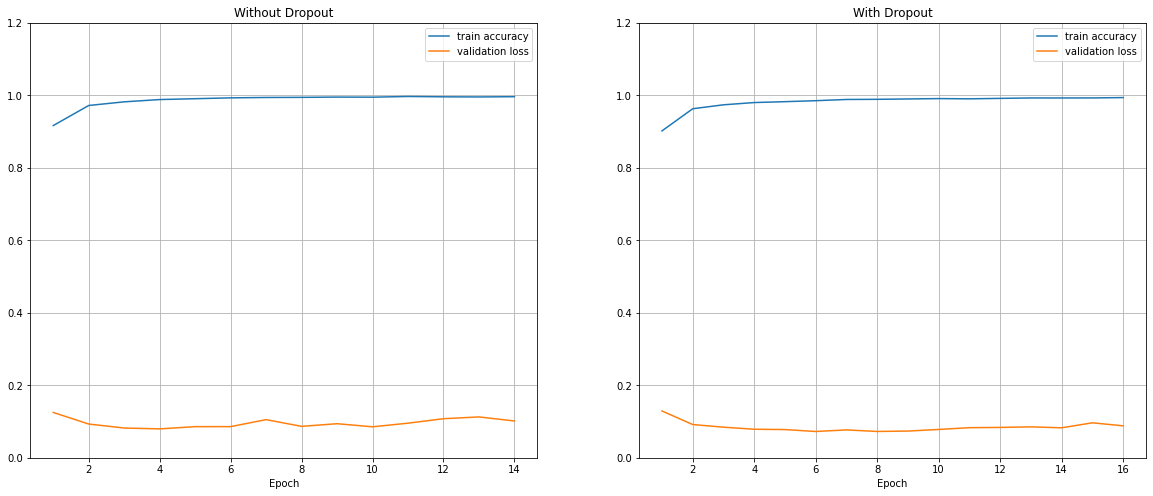

In [31]:
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(xs1, y_acc1, label='train accuracy')
plt.plot(xs1, y_vloss1, label='validation loss')
plt.legend(), plt.grid()
plt.ylim([0,1.2])
plt.xlabel('Epoch'), plt.title('Without Dropout')

plt.subplot(122)
plt.plot(xs2, y_acc2, label='train accuracy')
plt.plot(xs2, y_vloss2, label='validation loss')
plt.legend(), plt.grid()
plt.ylim([0,1.2])
plt.xlabel('Epoch'), plt.title('With Dropout')

plt.show()